<a href="https://colab.research.google.com/github/wrzoskamil/UMWF/blob/main/Use_case_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import math
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression

In [2]:
dane = pd.read_csv("/content/case1.csv", sep = ";" , encoding ='utf-8')
dane.head(10)

,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,NaN,XENON
3,3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS
5,5,6,0x000895ad78f4403ecd9468900e68d6ee506136fd,0,9900.12,375.48,20926.68,2,3,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0,0
6,6,7,0x000d63fc5df52b0204374c2f5a3249779805d5d1,0,69.46,629.44,8660.35,25,11,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0,0
7,7,8,0x000e001ab444fa8d6dc4a402f8d7cfc88fe8c64d,0,1497.39,176.84,319828.05,213,5,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,7.0,NaN,XENON
8,8,9,0x0012cb699c836049a4bbeaac2d8c4d47c688e0e4,0,0.00,0.00,496.62,1,1,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0,0
9,9,10,0x0012f247c9f980eea0a9ad06893bfd95c3145794,0,2570.59,3336.01,30572.70,8,3,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,1.0,NaN,AICRYPTO


In [3]:
dane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 51 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Unnamed: 0                                            9841 non-null   int64  
 1   Index                                                 9841 non-null   int64  
 2   Address                                               9841 non-null   object 
 3   FLAG                                                  9841 non-null   int64  
 4   Avg min between sent tnx                              9841 non-null   float64
 5   Avg min between received tnx                          9841 non-null   float64
 6   Time Diff between first and last (Mins)               9841 non-null   float64
 7   Sent tnx                                              9841 non-null   int64  
 8   Received Tnx                                          9841

In [4]:
dane.describe()

,Unnamed: 0,Index,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
count,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,...,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9012.0,9012.0,9012.0,9012.000000,9012.000000
mean,4920.000000,1815.049893,0.221421,5086.878721,8004.851184,2.183333e+05,115.931714,163.700945,3.729702,30.360939,...,1.252524e+08,4.346203e+06,1.174126e+04,1.303594e+07,6.318389e+06,0.0,0.0,0.0,1.384931,4.826676
std,2840.996333,1222.621830,0.415224,21486.549974,23081.714801,3.229379e+05,757.226361,940.836550,141.445583,298.621112,...,1.053741e+10,2.141192e+08,1.053567e+06,1.179905e+09,5.914764e+08,0.0,0.0,0.0,6.735121,16.678607
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
25%,2460.000000,821.000000,0.000000,0.000000,0.000000,3.169300e+02,1.000000,1.000000,0.000000,1.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
50%,4920.000000,1641.000000,0.000000,17.340000,509.770000,4.663703e+04,3.000000,4.000000,0.000000,2.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
75%,7380.000000,2601.000000,0.000000,565.470000,5480.390000,3.040710e+05,11.000000,27.000000,0.000000,5.000000,...,9.900000e+01,2.946467e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,2.000000
max,9840.000000,4729.000000,1.000000,430287.670000,482175.490000,1.954861e+06,10000.000000,10000.000000,9995.000000,9999.000000,...,1.000000e+12,1.724181e+10,1.000000e+08,1.120000e+11,5.614756e+10,0.0,0.0,0.0,213.000000,737.000000


In [5]:
for i in dane.columns:
  print(dane[i].value_counts())
  print('*'*50)

Unnamed: 0
0       1
6564    1
6557    1
6558    1
6559    1
       ..
3281    1
3282    1
3283    1
3284    1
9840    1
Name: count, Length: 9841, dtype: int64
**************************************************
Index
1       3
1458    3
1452    3
1453    3
1454    3
       ..
3527    1
3526    1
3525    1
3524    1
4729    1
Name: count, Length: 4729, dtype: int64
**************************************************
Address
0x4cd526aa2db72eb1fd557b37c6b0394acd35b212    2
0x4cd3bb2110eda1805dc63abc1959a5ee2d386e9f    2
0x4c1da8781f6ca312bc11217b3f61e5dfdf428de1    2
0x4c24af967901ec87a6644eb1ef42b680f58e67f5    2
0x4c268c7b1d51b369153d6f1f28c61b15f0e17746    2
                                             ..
0x57b417366e5681ad493a03492d9b61ecd0d3d247    1
0x57bb2d6426fed243c633d0b16d4297d12bc20638    1
0x57c0cf70020f0af5073c24cb272e93e7529c6a40    1
0x57ccf2b7ffe5e4497a7e04ac174646f5f16e24ce    1
0xd624d046edbdef805c5e4140dce5fb5ec1b39a3c    1
Name: count, Length: 9816, dtype: int64
*****

In [6]:
#Na podstawie powyższych danych usuwamy niepotrzebne kolumny oraz kolumny zawierające zera
dane2 = dane.drop(["Unnamed: 0", "Index", "Address", "ERC20 avg time between sent tnx",
                  "ERC20 avg time between rec tnx", "ERC20 avg time between rec 2 tnx",
                  "ERC20 avg time between contract tnx", "ERC20 avg val sent contract",
                  "ERC20 max val sent contract","ERC20 min val sent contract"], axis=1)
dane2.shape

(9841, 41)

In [7]:
#Sprawdzamy zmienne kategoryczne
zmienna_kat1 = dane2["ERC20 most sent token type"].value_counts()
zmienna_kat2 = dane2["ERC20_most_rec_token_type"].value_counts()

In [8]:
zmienna_kat1

ERC20 most sent token type
0                                                         4399
                                                          1191
EOS                                                        138
OmiseGO                                                    137
Golem                                                      130
                                                          ... 
BlockchainPoland                                             1
Covalent Token                                               1
Nebula AI Token                                              1
Blocktix                                                     1
eosDAC Community Owned EOS Block Producer ERC20 Tokens       1
Name: count, Length: 304, dtype: int64

In [9]:
len(zmienna_kat1)

304

In [10]:
zmienna_kat2

ERC20_most_rec_token_type
0                        4399
OmiseGO                   873
Blockwell say NOTSAFU     779
DATAcoin                  358
Livepeer Token            207
                         ... 
BCDN                        1
Egretia                     1
UG Coin                     1
Yun Planet                  1
INS Promo1                  1
Name: count, Length: 466, dtype: int64

In [11]:
len(zmienna_kat2)

466

In [12]:
#Zamieniamy braki danych, spacje oraz zera na etykietę "None".
dane2["ERC20 most sent token type"].fillna(value="None", inplace=True)
dane2['ERC20 most sent token type'].replace(' ', "None", inplace=True)
dane2['ERC20 most sent token type'].replace("0", "None", inplace=True)
dane2["ERC20_most_rec_token_type"].fillna(value="None", inplace=True)
dane2['ERC20_most_rec_token_type'].replace(' ', "None", inplace=True)
dane2['ERC20_most_rec_token_type'].replace("0", "None", inplace=True)

In [13]:
dane2["ERC20 most sent token type"].value_counts()

ERC20 most sent token type
None                                                      8287
EOS                                                        138
OmiseGO                                                    137
Golem                                                      130
blockwell.ai KYC Casper Token                              128
                                                          ... 
Arcona Distribution Contract                                 1
HeroCoin                                                     1
Cindicator                                                   1
UnlimitedIP Token                                            1
eosDAC Community Owned EOS Block Producer ERC20 Tokens       1
Name: count, Length: 303, dtype: int64

In [14]:
dane2["ERC20_most_rec_token_type"].value_counts()

ERC20_most_rec_token_type
None                     5291
OmiseGO                   873
Blockwell say NOTSAFU     779
DATAcoin                  358
Livepeer Token            207
                         ... 
BCDN                        1
Egretia                     1
UG Coin                     1
Yun Planet                  1
INS Promo1                  1
Name: count, Length: 465, dtype: int64

In [15]:
#one-hot encoding dla 10 najpopularniejszych kategorii
one_hot_encoded = pd.get_dummies(dane2['ERC20 most sent token type'])
# Najpopularniejsze 10 kategorii
pop_kategorie = dane2['ERC20 most sent token type'].value_counts().nlargest(10).index
# Ograniczamy zbiór
one_hot_encoded = one_hot_encoded[pop_kategorie]
# Dołączamy nowe kolumny do głównej ramki danych
dane2_encoded = pd.concat([dane2, one_hot_encoded], axis=1)
# Usuwamy pierwotną kolumnę "ERC20 most sent token type"
dane2_encoded.drop(columns=['ERC20 most sent token type'], inplace=True)

In [16]:
one_hot_encoded2 = pd.get_dummies(dane2_encoded['ERC20_most_rec_token_type'])
pop_kategorie2 = dane2_encoded['ERC20_most_rec_token_type'].value_counts().nlargest(10).index
one_hot_encoded2 = one_hot_encoded2[pop_kategorie2]
dane2_encoded = pd.concat([dane2_encoded, one_hot_encoded2], axis=1)
dane2_encoded.drop(columns=['ERC20_most_rec_token_type'], inplace=True)

In [17]:
dane2_encoded.shape

(9841, 59)

In [18]:
#Usuwamy braki danych
total_missing_values = dane2_encoded.isna().sum()
print( total_missing_values)

FLAG                                                      0
Avg min between sent tnx                                  0
Avg min between received tnx                              0
Time Diff between first and last (Mins)                   0
Sent tnx                                                  0
Received Tnx                                              0
Number of Created Contracts                               0
Unique Received From Addresses                            0
Unique Sent To Addresses                                  0
min value received                                        0
max value received                                        0
avg val received                                          0
min val sent                                              0
max val sent                                              0
avg val sent                                              0
min value sent to contract                                0
max val sent to contract                

In [19]:
#oczyszczny zbiór danych
dane3 = dane2_encoded.dropna()
dane3.shape

(9012, 59)

In [ ]:
#Przekształcamy zmienne typu int na zmienne typu float
dane3['Sent tnx'] = pd.to_numeric(dane3['Sent tnx'], downcast='float')
dane3['Received Tnx'] = pd.to_numeric(dane3['Received Tnx'], downcast='float')
dane3['Number of Created Contracts'] = pd.to_numeric(dane3['Number of Created Contracts'], downcast='float')
dane3['Unique Received From Addresses'] = pd.to_numeric(dane3['Unique Received From Addresses'], downcast='float')
dane3['Unique Sent To Addresses'] = pd.to_numeric(dane3['Unique Sent To Addresses'], downcast='float')
dane3['total transactions (including tnx to create contract'] = pd.to_numeric(dane3['total transactions (including tnx to create contract'], downcast='float')

In [21]:
dane3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9012 entries, 0 to 9840
Data columns (total 59 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   FLAG                                                  9012 non-null   int64  
 1   Avg min between sent tnx                              9012 non-null   float64
 2   Avg min between received tnx                          9012 non-null   float64
 3   Time Diff between first and last (Mins)               9012 non-null   float64
 4   Sent tnx                                              9012 non-null   float32
 5   Received Tnx                                          9012 non-null   float32
 6   Number of Created Contracts                           9012 non-null   float32
 7   Unique Received From Addresses                        9012 non-null   float32
 8   Unique Sent To Addresses                              9012 non-

In [22]:
#usuwamy wartości odstające w kolumnach ze zmiennymi numerycznymi
column_names = dane3.columns.tolist()
columns_numeric = [column_names[i] for i in range(1, 38)]
columns_numeric

['Avg min between sent tnx',
 'Avg min between received tnx',
 'Time Diff between first and last (Mins)',
 'Sent tnx',
 'Received Tnx',
 'Number of Created Contracts',
 'Unique Received From Addresses',
 'Unique Sent To Addresses',
 'min value received',
 'max value received ',
 'avg val received',
 'min val sent',
 'max val sent',
 'avg val sent',
 'min value sent to contract',
 'max val sent to contract',
 'avg value sent to contract',
 'total transactions (including tnx to create contract',
 'total Ether sent',
 'total ether received',
 'total ether sent contracts',
 'total ether balance',
 'Total ERC20 tnxs',
 'ERC20 total Ether received',
 'ERC20 total ether sent',
 'ERC20 total Ether sent contract',
 'ERC20 uniq sent addr',
 'ERC20 uniq rec addr',
 'ERC20 uniq sent addr.1',
 'ERC20 uniq rec contract addr',
 'ERC20 min val rec',
 'ERC20 max val rec',
 'ERC20 avg val rec',
 'ERC20 min val sent',
 'ERC20 max val sent',
 'ERC20 avg val sent',
 'ERC20 uniq sent token name']

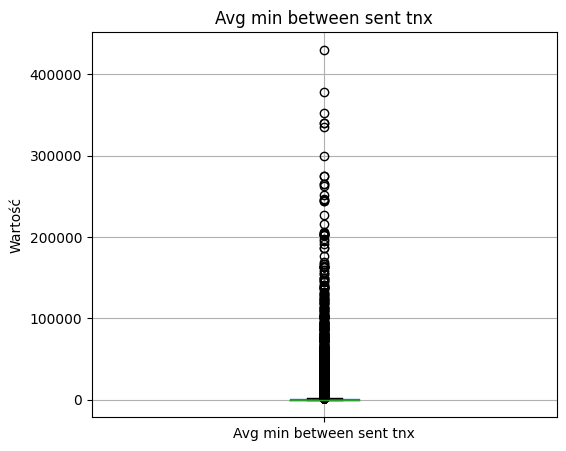

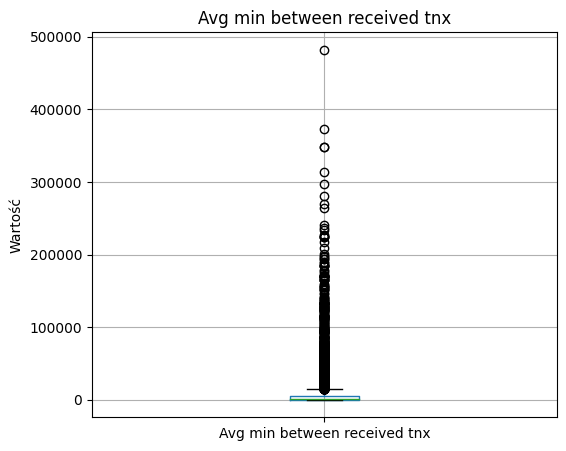

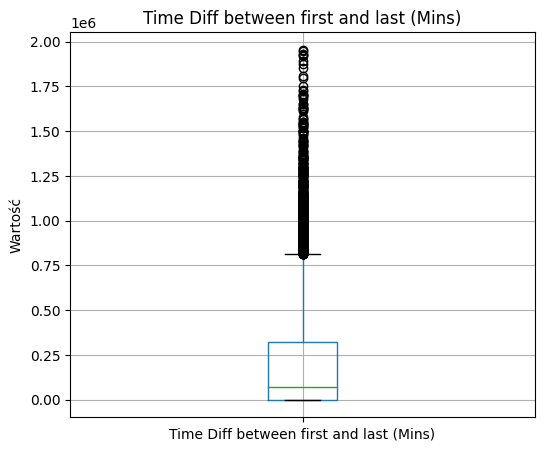

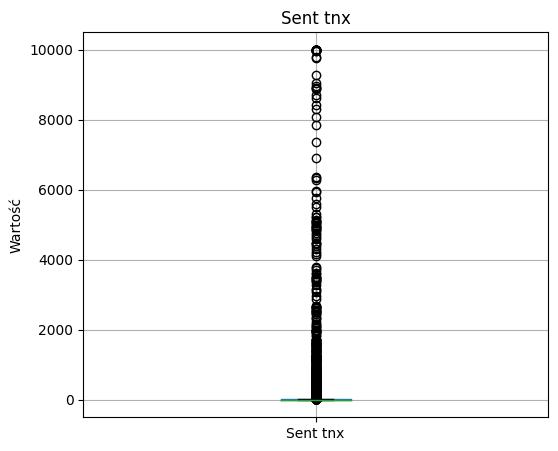

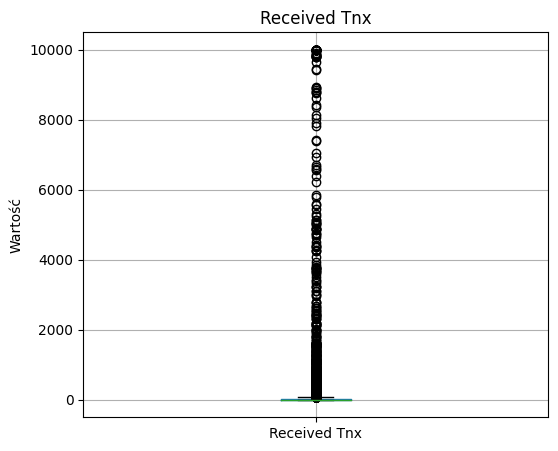

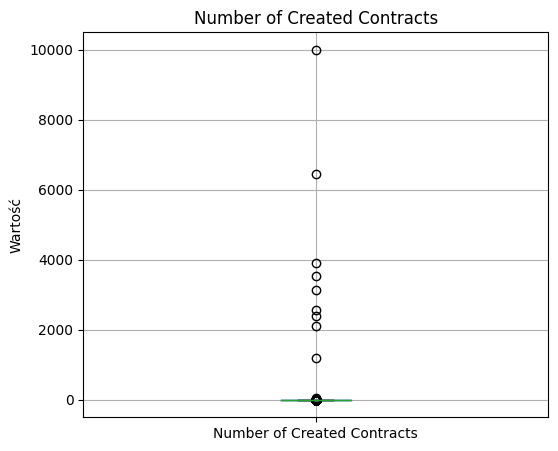

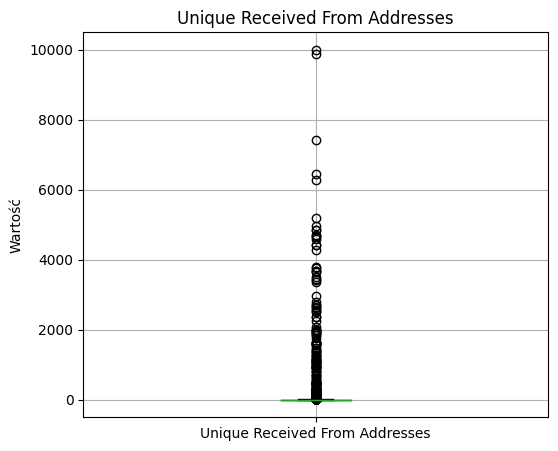

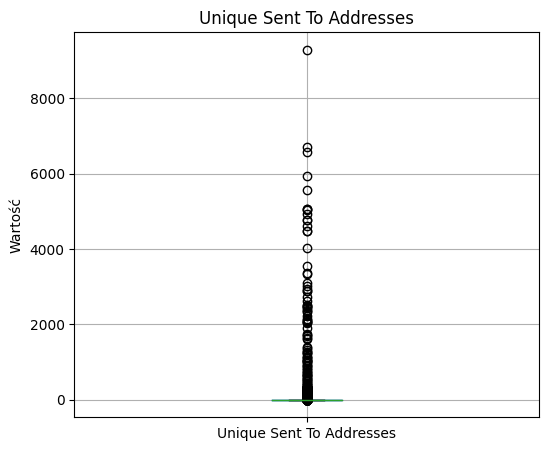

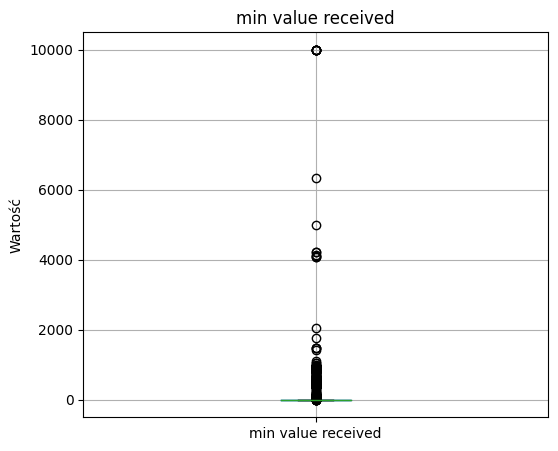

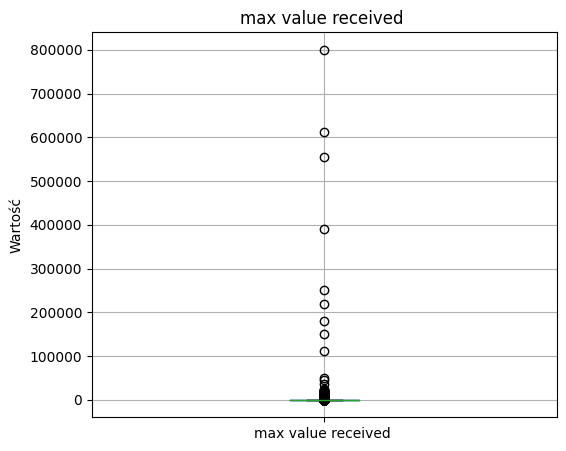

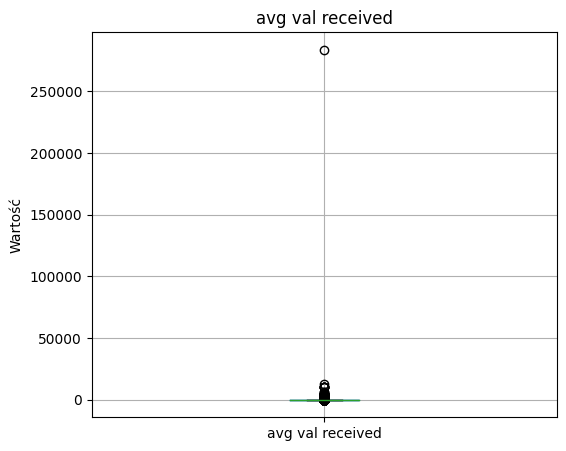

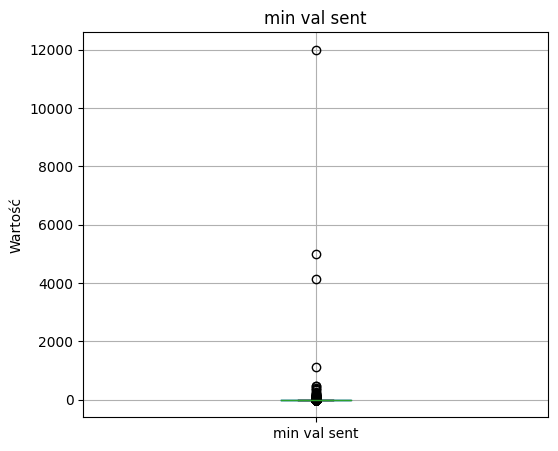

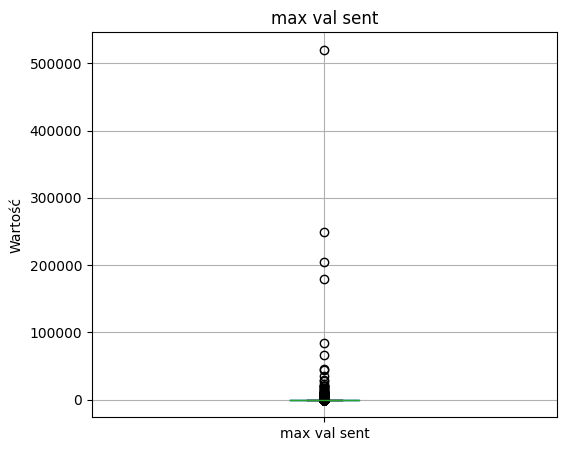

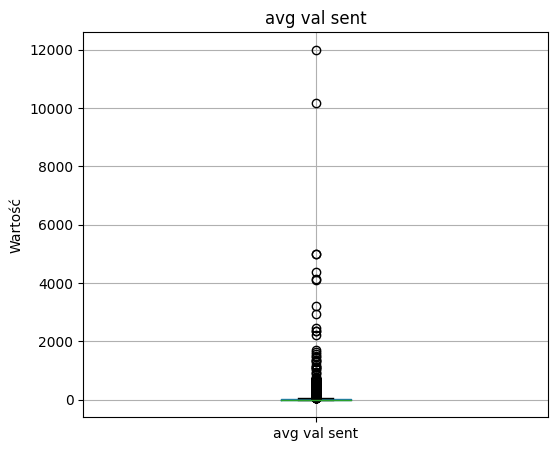

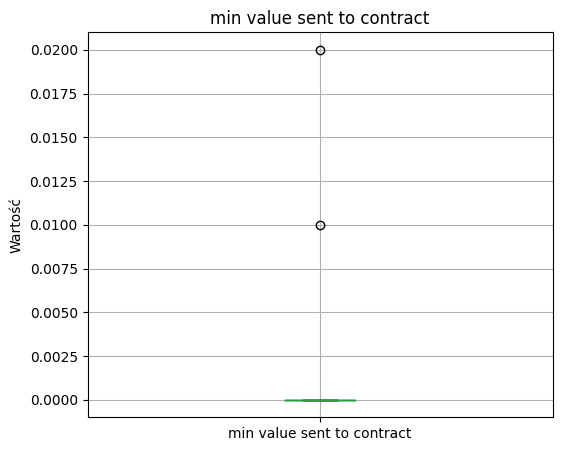

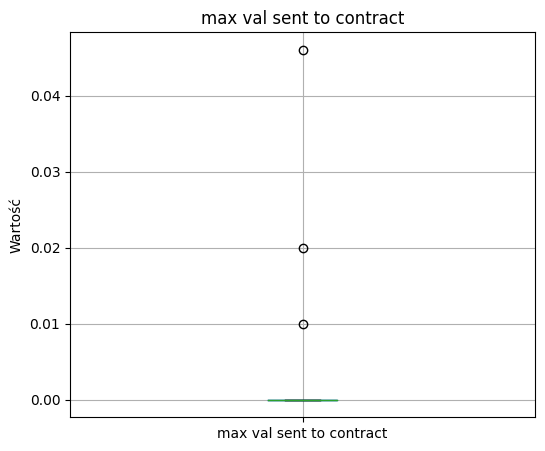

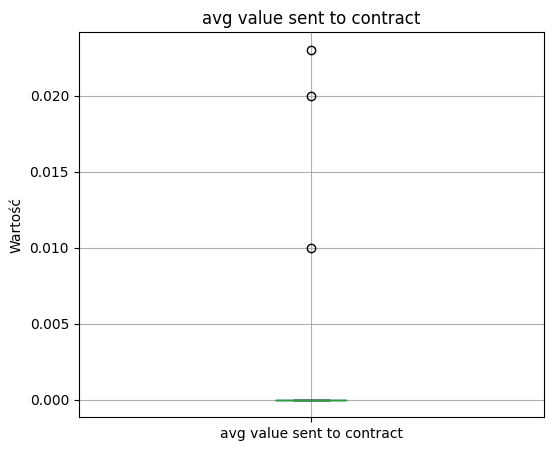

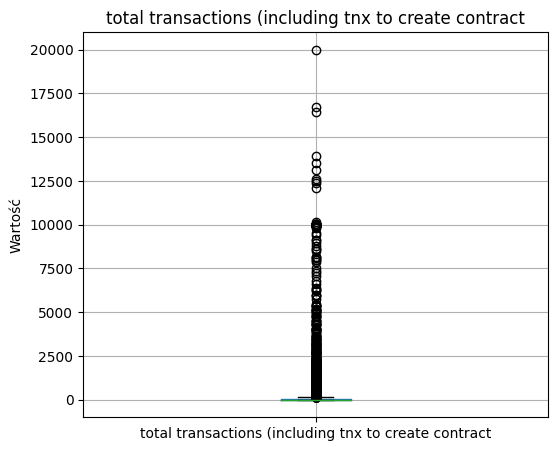

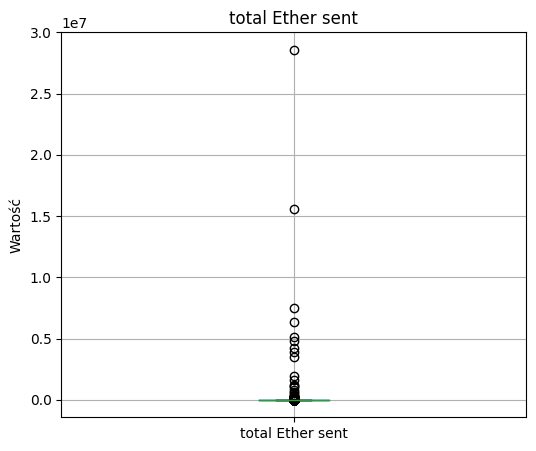

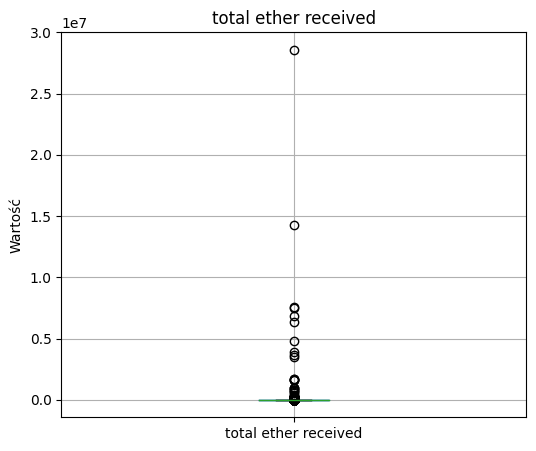

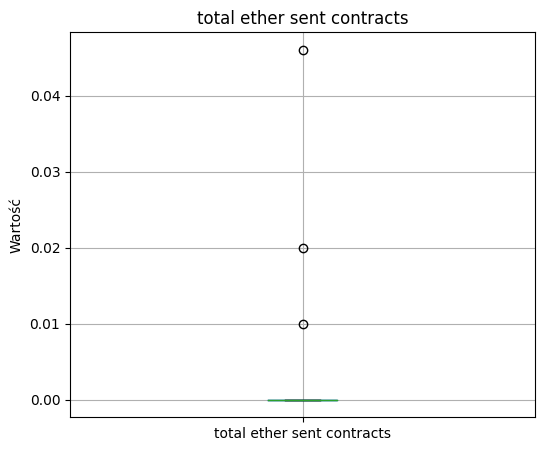

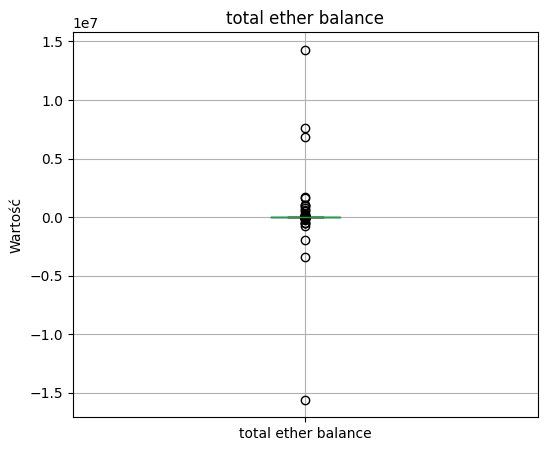

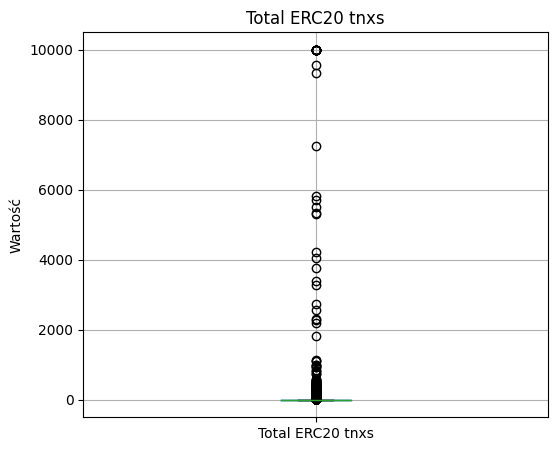

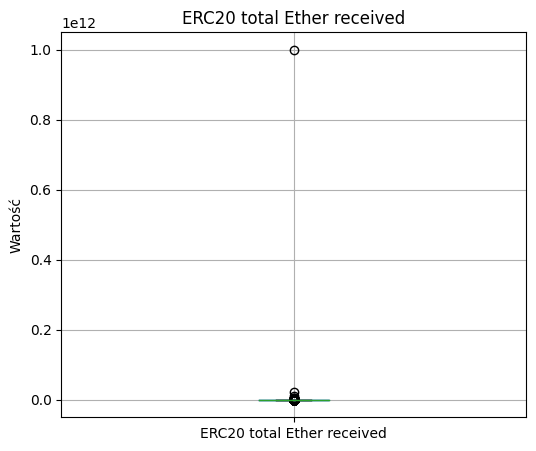

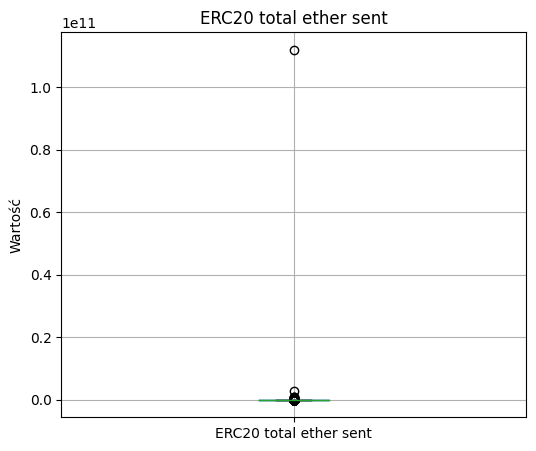

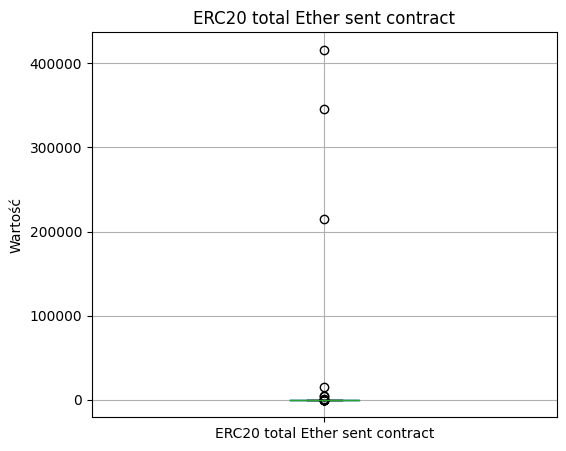

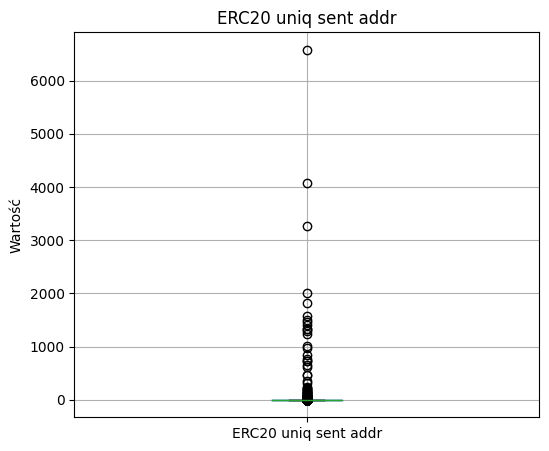

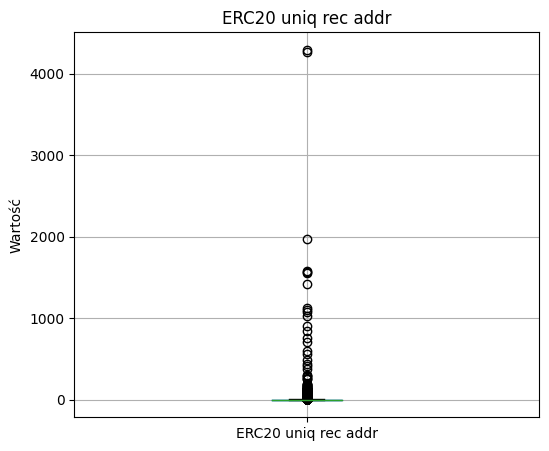

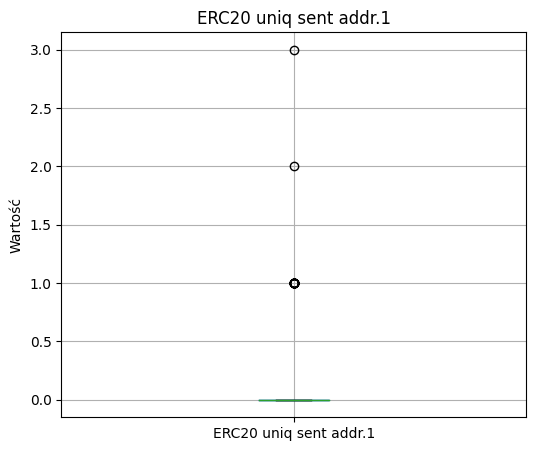

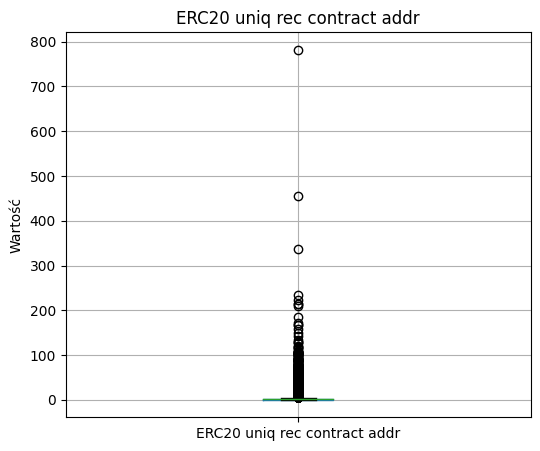

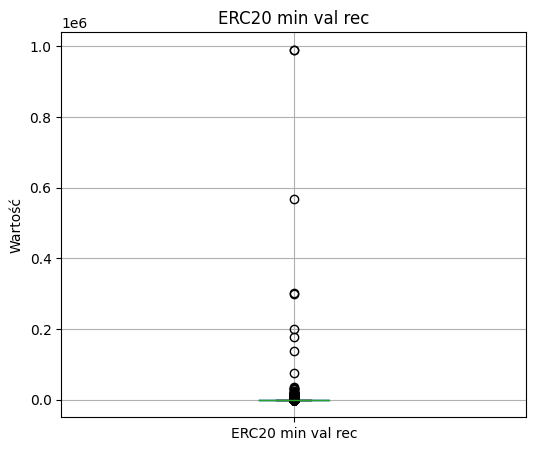

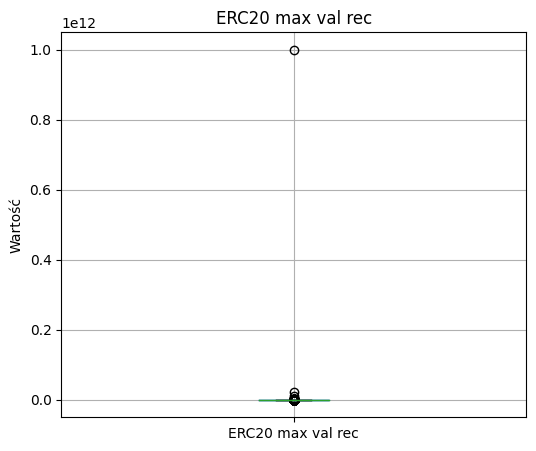

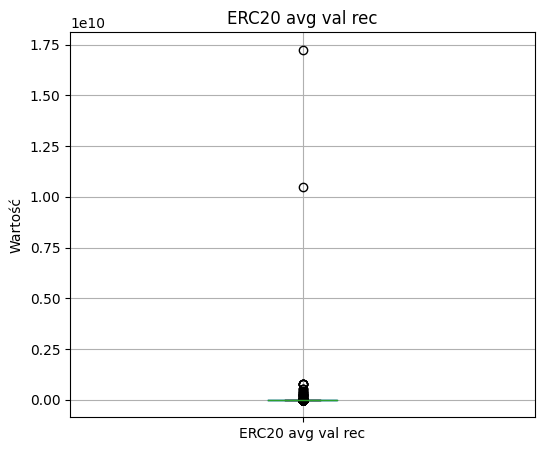

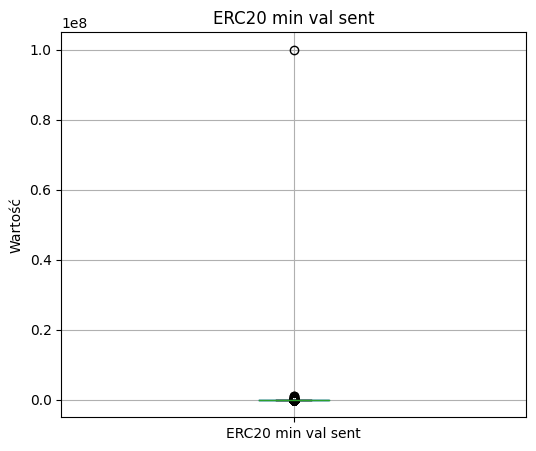

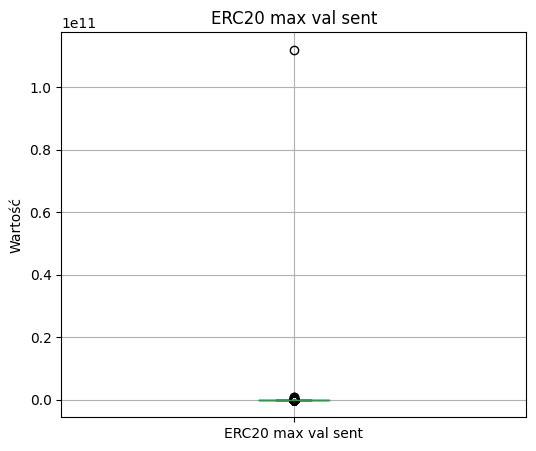

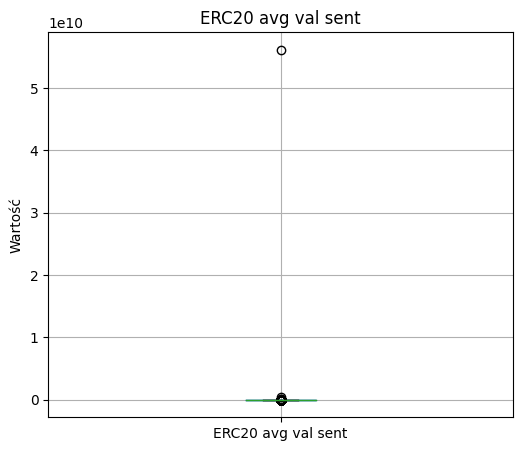

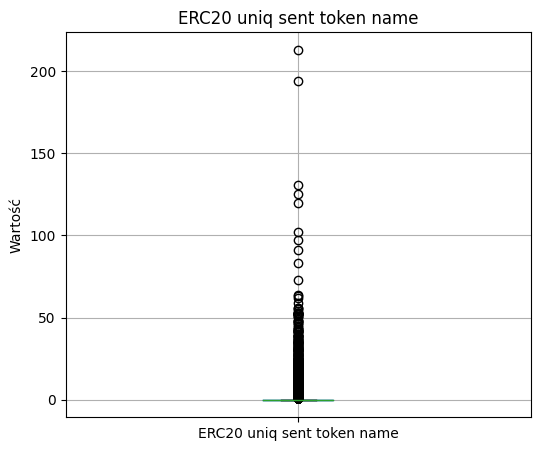

In [23]:
#Tworzymy wykresy pudełkowe dla zmiennych numerycznych aby zlokalizować wartości odstające
for column in columns_numeric:
        plt.figure(figsize=(6, 5))
        dane3.boxplot(column=column)
        plt.title(f'{column}')
        plt.ylabel('Wartość')
        plt.xlabel('')
        plt.show()

In [24]:
#Na podstawie wykresów dla każdej zmiennej ustalam i usuwam odpowiednią ilość wartości odstających oraz sortuje wartości
dane3['Avg min between sent tnx'] = dane3['Avg min between sent tnx'].sort_values().iloc[:-10]
dane3['Avg min between received tnx'] = dane3['Avg min between received tnx'].sort_values().iloc[:-10]
dane3['Unique Received From Addresses'] = dane3['Unique Received From Addresses'].sort_values().iloc[:-5]
dane3['Unique Sent To Addresses'] = dane3['Unique Sent To Addresses'].sort_values().iloc[:-5]
dane3['min value received'] = dane3['min value received'].sort_values().iloc[:-10]
dane3['avg val sent'] = dane3['avg val sent'].sort_values().iloc[:-6]
dane3['total transactions (including tnx to create contract'] = dane3['total transactions (including tnx to create contract'].sort_values().iloc[:-15]
dane3['total Ether sent'] = dane3['total Ether sent'].sort_values().iloc[:-4]
dane3['max value received '] = dane3['max value received '].sort_values().iloc[:-10]
dane3['avg val received'] = dane3['avg val received'].sort_values().iloc[:-1]
dane3['min val sent'] = dane3['min val sent'].sort_values().iloc[:-4]
dane3['max val sent'] = dane3['max val sent'].sort_values().iloc[:-7]
dane3['total ether received'] = dane3['total ether received'].sort_values().iloc[:-2]
dane3['total ether balance'] = dane3['total ether balance'].sort_values().iloc[:-3]
dane3['Total ERC20 tnxs'] = dane3['Total ERC20 tnxs'].sort_values().iloc[:-30]
dane3['ERC20 total Ether received'] = dane3['ERC20 total Ether received'].sort_values().iloc[:-1]
dane3['ERC20 total ether sent'] = dane3['ERC20 total ether sent'].sort_values().iloc[:-1]
dane3['ERC20 total Ether sent contract'] = dane3['ERC20 total Ether sent contract'].sort_values().iloc[:-3]
dane3['ERC20 uniq sent addr'] = dane3['ERC20 uniq sent addr'].sort_values().iloc[:-3]
dane3['ERC20 uniq rec addr'] = dane3['ERC20 uniq rec addr'].sort_values().iloc[:-10]
dane3['ERC20 uniq rec contract addr'] = dane3['ERC20 uniq rec contract addr'].sort_values().iloc[:-3]
dane3['ERC20 min val rec'] = dane3['ERC20 min val rec'].sort_values().iloc[:-5]
dane3['ERC20 max val rec'] = dane3['ERC20 max val rec'].sort_values().iloc[:-1]
dane3['ERC20 avg val rec'] = dane3['ERC20 avg val rec'].sort_values().iloc[:-2]
dane3['ERC20 min val sent'] = dane3['ERC20 min val sent'].sort_values().iloc[:-1]
dane3['ERC20 max val sent'] = dane3['ERC20 max val sent'].sort_values().iloc[:-1]
dane3['ERC20 avg val sent'] = dane3['ERC20 avg val sent'].sort_values().iloc[:-1]
dane3['ERC20 uniq sent token name'] = dane3['ERC20 uniq sent token name'].sort_values().iloc[:-10]

<ipython-input-24-6a4e50bb97bd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dane3['Avg min between sent tnx'] = dane3['Avg min between sent tnx'].sort_values().iloc[:-10]
<ipython-input-24-6a4e50bb97bd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dane3['Avg min between received tnx'] = dane3['Avg min between received tnx'].sort_values().iloc[:-10]
<ipython-input-24-6a4e50bb97bd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [25]:
dane_bez_wartosci_odstajacych = dane3.dropna()
dane_bez_wartosci_odstajacych.shape

(8899, 59)

In [ ]:
#Normalizujemy zmienne
scaler = MinMaxScaler()

for i in dane_bez_wartosci_odstajacych[columns_numeric]:
  dane_bez_wartosci_odstajacych[i] = scaler.fit_transform(dane_bez_wartosci_odstajacych[[i]])

dane_normalizowane = dane_bez_wartosci_odstajacych

In [27]:
dane_normalizowane.shape

(8899, 59)

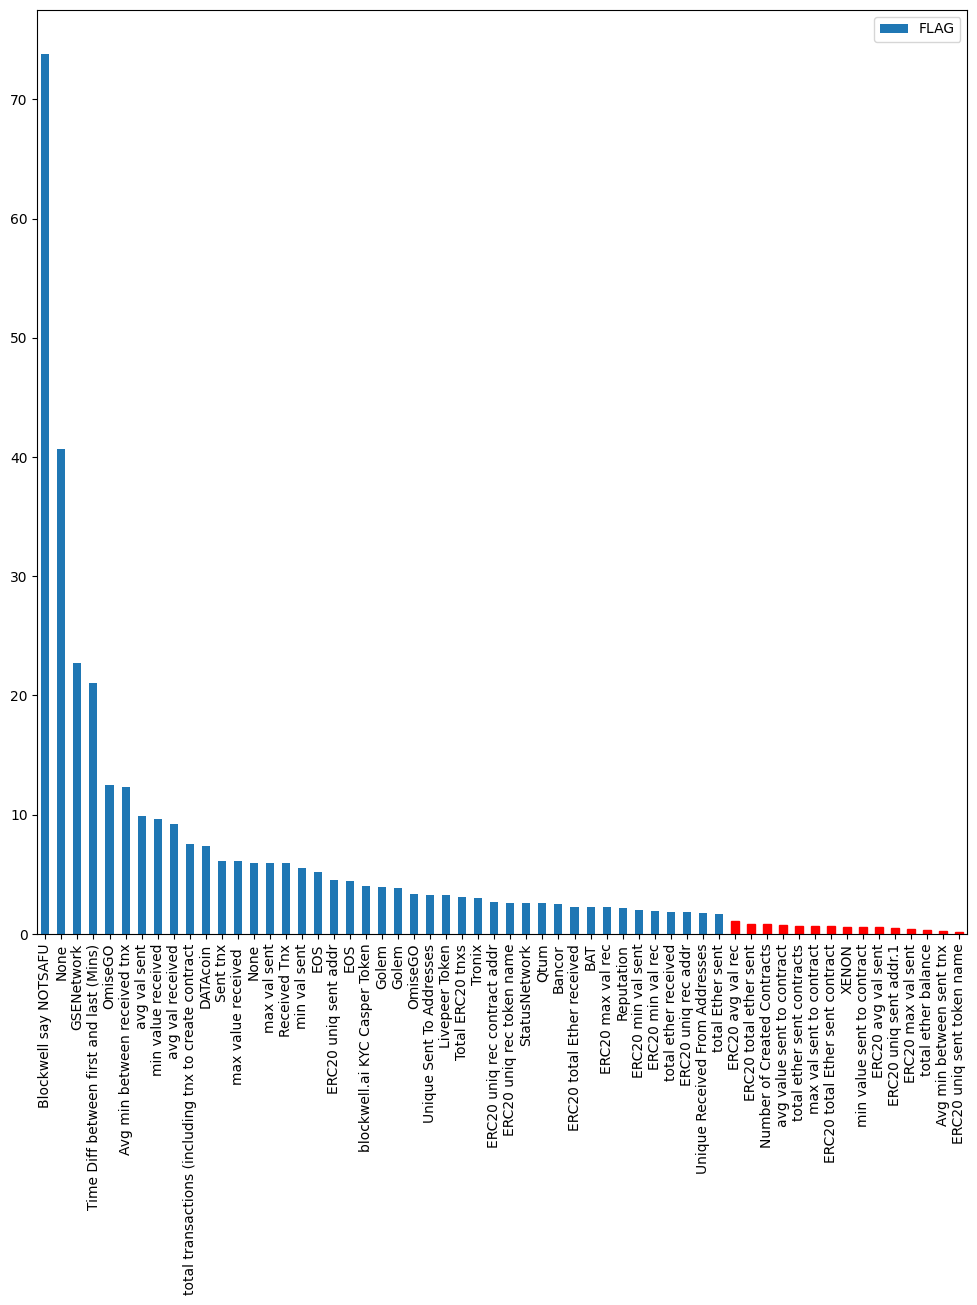

In [28]:
#Wykres korelacji cech
wykres_korelacji_cech = pd.DataFrame(abs(dane_normalizowane.corr()['FLAG'].drop('FLAG')*100).sort_values(ascending=False)).plot.bar(figsize = (12,12))

for bar in wykres_korelacji_cech.patches[-15:]:
    bar.set_color('red')

plt.show()

In [29]:
# Usuwamy kolumny zaznaczone na wykresie kolorem czerwonym

dane_normalizowane2 = dane_normalizowane.drop(["ERC20 uniq sent token name", "Avg min between sent tnx",
                             "total ether balance", "ERC20 max val sent",
                             "ERC20 uniq sent addr.1", "ERC20 avg val sent",
                             "min value sent to contract", "XENON",
                             "ERC20 total Ether sent contract", "max val sent to contract",
                             "total ether sent contracts", "avg value sent to contract",
                             "Number of Created Contracts", "ERC20 total ether sent",
                             "ERC20 avg val rec"], axis=1)
dane_normalizowane2.shape

(8899, 44)

In [30]:
#PCA
X_before_PCA = dane_normalizowane2.drop('FLAG', axis=1)
X_before_PCA.head()

,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,...,Reputation,None,OmiseGO,Blockwell say NOTSAFU,DATAcoin,Livepeer Token,EOS,Golem,GSENetwork,Tronix
0,0.004618,0.360530,0.072107,0.0089,0.008066,0.023288,0.000000,0.001309,0.001040,0.000000,...,False,False,False,False,False,False,False,False,False,False
1,0.012491,0.623173,0.009401,0.0008,0.001008,0.002763,0.000000,0.000075,0.000061,0.000000,...,False,False,False,False,False,True,False,False,False,False
2,0.010277,0.264330,0.000200,0.0010,0.002017,0.000395,0.000027,0.000033,0.000057,0.000104,...,False,False,False,False,False,False,False,False,False,False
3,0.066647,0.203368,0.002500,0.0009,0.001412,0.002566,0.000000,0.014286,0.015709,0.000000,...,False,False,False,False,False,False,False,False,False,False
4,0.045210,0.195652,0.459846,0.0020,0.001412,0.003750,0.000000,0.000366,0.000422,0.000000,...,False,False,False,False,False,False,True,False,False,False


In [31]:
y = dane_normalizowane2['FLAG']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: FLAG, dtype: int64

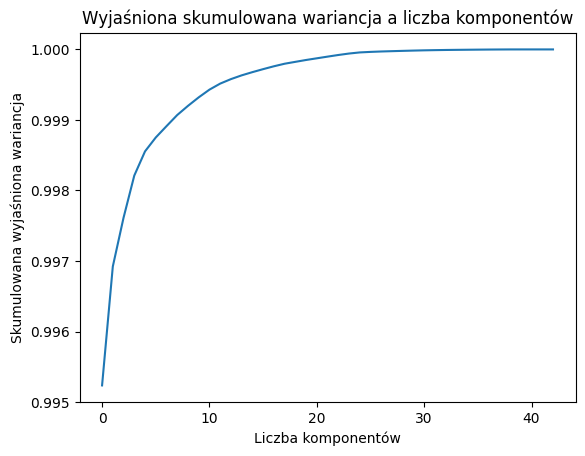

In [32]:
# Inicjujemy obiekt PCA i dopasowujemy do danych
pca = PCA()
pca.fit(X_before_PCA)
#Tworzymy wykres łokcia przedstawiający skumulowana wyjaśnioną wariancję i liczbę komponentów
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Liczba komponentów')
plt.ylabel('Skumulowana wyjaśniona wariancja')
plt.title('Wyjaśniona skumulowana wariancja a liczba komponentów')
plt.show()

In [33]:
#Zachowujemy 25 komponentów
pca = PCA(n_components=25)
principalComponents = pca.fit_transform(X_before_PCA)

#Tworzymy ramkę danych z cechami objaśniającymi
X = pd.DataFrame(data = principalComponents,
                           columns = ['V1', 'V2','V3','V4','V5','V6','V7','V8','V9','V10',
                          'V11','V12','V13','V14','V15','V16','V17','V18','V19','V20',
                          'V21','V22','V23','V24','V25'])

In [34]:
X.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25
0,52.656917,0.255749,0.035387,-0.040228,-0.054241,-0.042150,-0.113443,0.092325,-0.130477,-0.035727,...,-0.039921,-0.040283,-0.023087,-0.006321,0.045307,0.001529,-0.025558,-0.012812,0.039193,-0.035008
1,2.670660,-0.641932,-0.684156,-0.215340,0.178515,0.639414,0.040660,0.016819,-0.523483,0.028940,...,0.003476,-0.234747,-0.077037,-0.021265,-0.036754,0.000223,-0.009523,0.014681,0.078893,-0.069523
2,3.651795,-0.312812,0.182960,0.010685,0.238464,0.182558,0.051958,0.045036,0.044370,-0.096553,...,-0.035145,-0.005501,0.033778,-0.005334,0.003260,-0.012105,-0.017066,-0.013305,-0.012849,0.011100
3,6.666884,-0.503037,-0.588264,-0.213922,-0.047930,-0.009436,-0.033043,0.029164,-0.129526,0.022517,...,-0.043597,0.008101,-0.046799,-0.033740,0.011234,-0.018063,-0.000399,-0.008866,0.061469,-0.057063
4,22.667759,-0.264391,-0.479096,-0.205114,-0.053593,0.010947,0.340026,-0.351339,0.312379,0.315591,...,1.147154,0.072442,0.157352,0.149062,0.324236,0.086972,0.089598,0.060140,-0.056636,-0.015372
5,-4.361675,0.477831,-0.008881,0.006588,-0.030894,-0.025293,0.006130,0.020013,-0.008025,0.034583,...,-0.000036,-0.013379,0.001042,0.003150,0.000505,0.015926,-0.029555,-0.002046,-0.002660,0.002117
6,-4.361696,0.478302,-0.008101,0.006314,-0.031523,-0.026249,0.004395,0.020168,-0.006373,0.040300,...,0.000207,-0.010301,0.000344,0.004020,0.003639,0.016717,-0.030258,-0.002383,-0.002925,0.002215
7,2.651523,-0.321031,0.183439,0.001839,0.224888,0.158772,0.045161,0.065736,0.051087,-0.010514,...,-0.035018,0.018122,0.029860,-0.000397,0.026677,-0.009716,-0.017070,-0.016739,-0.014437,0.011537
8,-4.361735,0.478721,-0.007344,0.006041,-0.032639,-0.028570,0.006540,0.023675,-0.008736,0.042823,...,-0.000224,-0.011178,0.000970,0.003211,0.001153,0.016459,-0.030190,-0.002277,-0.002759,0.002175
9,-3.347907,-0.408837,0.120129,-0.027243,0.204382,0.123460,0.063897,0.103270,0.039494,0.089338,...,-0.038865,0.073076,0.025289,-0.007574,0.020798,-0.009569,-0.013323,-0.018309,-0.011089,0.008295


In [35]:
y.value_counts()
#0 - nie jest oszustwem
#1 - oszustwo

FLAG
0    7567
1    1332
Name: count, dtype: int64

In [36]:
# Dzielimy zbiory na uczące oraz testowe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [37]:
# Bilansujemy próbkę za pomocą oversamplingu SMOTE
oversampler = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

In [38]:
#Rozkład klas przez oversamplingiem
Counter(y_train)

Counter({0: 5075, 1: 887})

In [39]:
#Rozkład klas po oversamplingu
Counter(y_train_resampled)

Counter({0: 5075, 1: 5075})

In [40]:
#Model kNN 2 sąsiadów
random_state=42
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_resampled, y_train_resampled)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Accuracy", accuracy)
print("Precision", precision)
print("Recall", recall)
macierz_knn = confusion_matrix(y_test, y_pred)
macierz_knn

Accuracy 0.9673135852911133
Precision 0.8869179600886918
Recall 0.898876404494382


array([[2441,   51],
       [  45,  400]])

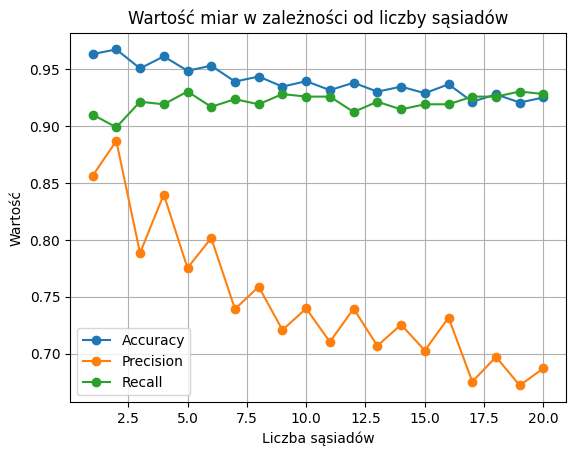

In [41]:
#Model kNN optymalizacja liczby sąsiadów
#Będziemy testować od 1 do 20 sąsiadów
neighbors = range(1, 21)

accuracies = []
precisions = []
recalls = []

random_state=42
for k in neighbors:
    # Inicjacja i dopasowanie klasyfikatora KNN
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train_resampled, y_train_resampled)

    # Predykcja na zbiorze testowym
    y_pred = knn_classifier.predict(X_test)

    # Obliczamy i przypisujemy miary do list
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)

plt.plot(neighbors, accuracies, marker='o', label='Accuracy')
plt.plot(neighbors, precisions, marker='o', label='Precision')
plt.plot(neighbors, recalls, marker='o', label='Recall')
plt.xlabel('Liczba sąsiadów')
plt.ylabel('Wartość')
plt.title('Wartość miar w zależności od liczby sąsiadów')
plt.legend()
plt.grid(True)
plt.show()

In [42]:
#Wyznaczam optymalną liczbę sąsiadów maksymalizującą recall
optimal_neighbors = neighbors[recalls.index(max(recalls))]
optimal_neighbors

5

In [43]:
acc = accuracies[4]
pre = precisions[4]
opt_recall = recalls[4]
print("Optymalna wartość recall:", opt_recall)
print("Accuracy:", acc)
print("Precision:", pre)

Optymalna wartość recall: 0.9303370786516854
Accuracy: 0.9485869935308138
Precision: 0.7752808988764045


In [ ]:
#Regresja logistyczna
#Manipulowanie wagami metodą próbi błędów - dla klasy 0 waga = 1, dla klasy 1 waga 0.74
weights = {0: 1, 1: 0.74}
logreg_model = LogisticRegression(random_state=42, solver='lbfgs', class_weight=weights)
logreg_model.fit(X_train_resampled, y_train_resampled)
y_pred_logreg = logreg_model.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
macierz_logreg = confusion_matrix(y_test, y_pred_logreg)

In [45]:
print("Accuracy:", accuracy_logreg)
print("Precision:", precision_logreg)
print("Recall:", recall_logreg)
print("Confusion Matrix:")
macierz_logreg

Accuracy: 0.9448416751787538
Precision: 0.7549549549549549
Recall: 0.9415730337078652
Confusion Matrix:


array([[2356,  136],
       [  26,  419]])

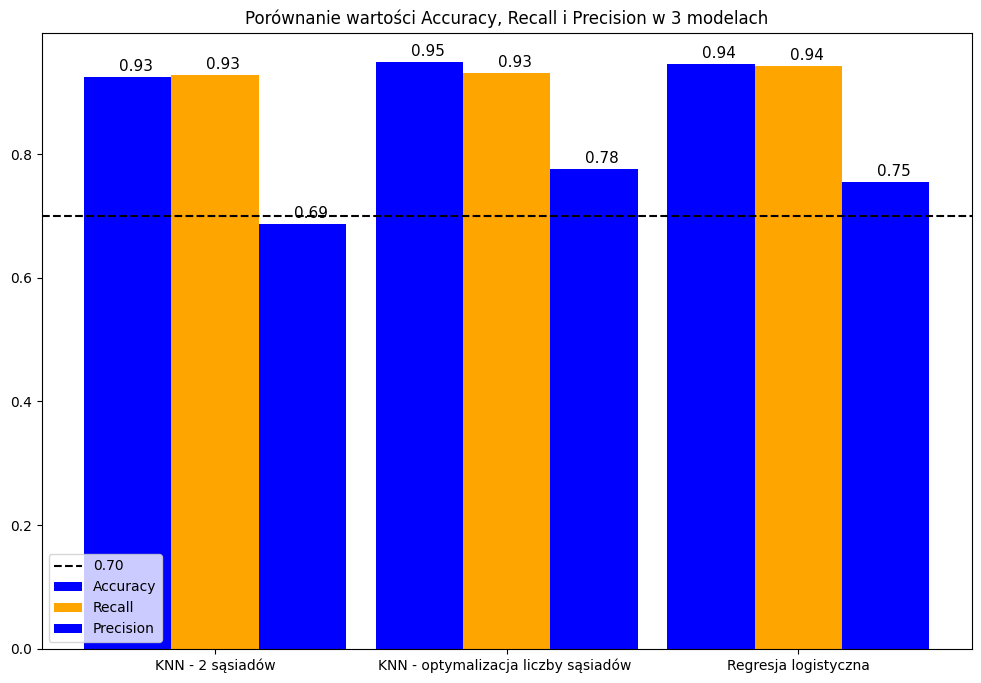

In [47]:
#Porównanie miar wszystkich 3 modeli
accuracy_values = [accuracy, acc, accuracy_logreg]
recall_values = [recall, opt_recall, recall_logreg]
precision_values = [precision, pre, precision_logreg]

plt.figure(figsize=(12, 8))

bar_width = 0.3
index = np.arange(3)


plt.bar(index, accuracy_values, bar_width, label='Accuracy', color='blue')
plt.bar(index + bar_width, recall_values, bar_width, label='Recall', color='orange')
plt.bar(index + 2*bar_width, precision_values, bar_width, label='Precision', color='blue')

for i in range(3):
    plt.text(index[i] - 0.03, accuracy_values[i] + 0.01, f'{accuracy_values[i]:.2f}', fontsize=11)
    plt.text(index[i] + bar_width - 0.03, recall_values[i] + 0.01, f'{recall_values[i]:.2f}', fontsize=11)
    plt.text(index[i] + 2*bar_width - 0.03, precision_values[i] + 0.01, f'{precision_values[i]:.2f}', fontsize=11)

plt.axhline(y=0.7, color='black', linestyle='--', label='0.70')

plt.title('Porównanie wartości Accuracy, Recall i Precision w 3 modelach')
plt.xticks(index + bar_width, ['KNN - 2 sąsiadów', 'KNN - optymalizacja liczby sąsiadów ',
                               'Regresja logistyczna'])

plt.legend(loc='lower left')

plt.show()

Na powyższym wykresie możemy zobaczyć porównanie wartości Accuracy, Recall oraz Precision dla 3 utworzonych wcześniej modeli

Najlepszym modelem okazał się model regresji logsitycznej, w którym:

Accuracy: 0.9448416751787538

Precision: 0.7549549549549549

Recall: 0.9415730337078652

W celu jak najlepszej wykrywalności oszustw zależało nam na maksymalizacji wartości recall i jak najwyższych wartościach accuracy oraz precision. Dodatkowo założyłem, że wartości dla accuracy oraz precision powinny wynosić co najmniej 0,70